In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, glob, shutil
import mahotas as mh

In [3]:
DATAFOLDER = '/hpcstor6/scratch01/r/ryan.zurrin001/Ocular_disease/'

In [4]:
os.listdir(DATAFOLDER)

['masks', 'images.npy', 'images', 'masks.npy']

In [5]:
#train_image_dir = os.path.join(DATAFOLDER, 'Train_In')
#test_image_dir = os.path.join(DATAFOLDER, 'Test_In')
#train_mask_dir =  os.path.join(DATAFOLDER, 'Train_Out')
#test_mask_dir = os.path.join(DATAFOLDER, 'Test_Out')
image_dir = os.path.join(DATAFOLDER, 'images')
mask_dir = os.path.join(DATAFOLDER, 'masks')

In [6]:
all_image_files = sorted(sorted(glob.glob(image_dir +'/*.jpg')))
all_mask_files = sorted(sorted(glob.glob(mask_dir +'/*.jpg')))

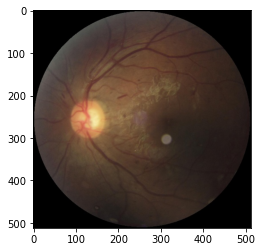

In [41]:
first_image = mh.imread(all_image_files[30])
imshow(first_image, cmap='gray')

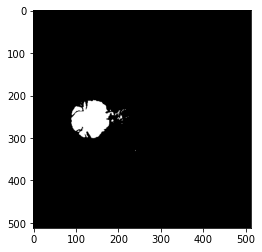

In [42]:
first_mask = mh.imread(all_mask_files[30])
imshow(first_mask, cmap='gray')

In [9]:
len(all_mask_files)

6392

In [10]:
first_mask.shape

(512, 512)

In [11]:
images = np.zeros((6392, 512, 512), dtype=np.uint8)

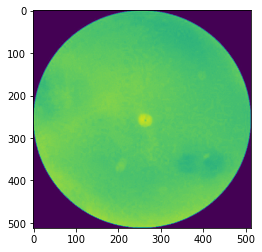

In [12]:
import numpy as np
import skimage.io as mh
import skimage.transform as skt

n_images = 6392  # number of images to load

# create array to hold the images
images = np.zeros((n_images, 512, 512), dtype=np.float32)

for i, a in enumerate(all_image_files[:n_images]):
    img = mh.imread(a)

    if img.ndim == 3:
        # grab left image
        left = img[0:512,0:512,0]
        left_resized = skt.resize(left, (512, 512), preserve_range=True)
        if np.prod(left_resized.shape) > 0:
            left_resized = left_resized.astype(np.float32)
            left_resized /= 255.0  # normalize pixel values to [0, 1]
            if i < len(images):
                images[i] = left_resized

        # grab right image
        right = img[0:512,512:,0]
        if right.shape[0] > 0 and right.shape[1] > 0:  # check if right has at least one pixel
            right_resized = skt.resize(right, (512, 512), preserve_range=True)
            if np.prod(right_resized.shape) > 0:
                right_resized = right_resized.astype(np.float32)
                right_resized /= 255.0  # normalize pixel values to [0, 1]
                if i < len(images):
                    images[i] = right_resized

    elif img.ndim == 2:
        left = img[0:512,0:512]
        left_resized = skt.resize(left, (512, 512), preserve_range=True)
        if np.prod(left_resized.shape) > 0:
            left_resized = left_resized.astype(np.float32)
            left_resized /= 255.0  # normalize pixel values to [0, 1]
            if i < len(images):
                images[i] = left_resized

        right = img[0:512,512:]
        if right.shape[0] > 0 and right.shape[1] > 0:  # check if right has at least one pixel
            right_resized = skt.resize(right, (512, 512), preserve_range=True)
            if np.prod(right_resized.shape) > 0:
                right_resized = right_resized.astype(np.float32)
                right_resized /= 255.0  # normalize pixel values to [0, 1]
                if i < len(images):
                    images[i] = right_resized


imshow(images[0])

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)

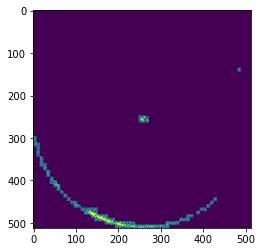

In [13]:
import numpy as np
import mahotas as mh
import skimage.transform as skt
import matplotlib.pyplot as plt

n_images = 6392
masks = np.zeros((n_images, 512, 512), dtype=np.bool)

for i, a in enumerate(all_mask_files):
    img = mh.imread(a)
    
    if img.ndim == 3:
        # grab left image
        left = img[0:512,0:512,0]
        left_resized = skt.resize(left, (512, 512), preserve_range=True)
        print(left_resized.shape)
        if np.prod(left_resized.shape) > 0:
            left_resized = left_resized.astype(np.bool)
            if i < len(masks):
                masks[i] = left_resized

        # grab right image
        right = img[0:512,512:,0]
        if right.shape[0] > 0 and right.shape[1] > 0:  # check if right has at least one pixel
            right_resized = skt.resize(right, (512, 512), preserve_range=True)
            print(right_resized.shape)
            if np.prod(right_resized.shape) > 0:
                right_resized = right_resized.astype(np.bool)
                if i < len(masks):
                    masks[i] = right_resized
                
    elif img.ndim == 2:
        left = img[0:512,0:512]
        left_resized = skt.resize(left, (512, 512), preserve_range=True)
        print(left_resized.shape)
        if np.prod(left_resized.shape) > 0:
            left_resized = left_resized.astype(np.bool)
            if i < len(masks):
                masks[i] = left_resized

        right = img[0:512,512:]
        if right.shape[0] > 0 and right.shape[1] > 0:  # check if right has at least one pixel
            right_resized = skt.resize(right, (512, 512), preserve_range=True)
            print(right_resized.shape)
            if np.prod(right_resized.shape) > 0:
                right_resized = right_resized.astype(np.bool)
                if i < len(masks):
                    masks[i] = right_resized


plt.imshow(masks[0])
plt.show()

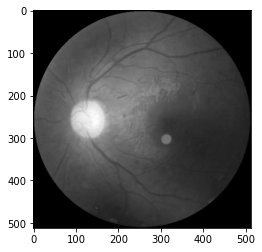

In [39]:
imshow(images2[30], cmap="gray")

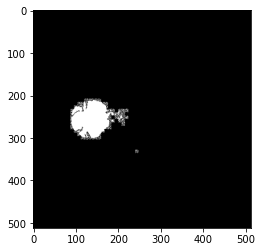

In [37]:
imshow(masks2[30], cmap="gray")

In [14]:
images2 = np.expand_dims(images, axis=-1)

In [15]:
images2.shape

(6392, 512, 512, 1)

In [16]:
masks2 = np.expand_dims(masks, axis=-1)

In [17]:
masks2.shape

(6392, 512, 512, 1)

In [18]:
np.save('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_images', images2)

In [19]:
np.save('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_masks.npy', masks2)